In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam 
import numpy as np 
import matplotlib.pyplot as plt

/home/cvnlp/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 函数定义

In [2]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        #    conv => relu => pool
        model.add(Conv2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # conv => relu => pool

        model.add(Conv2D(50, kernel_size=5, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model
            
    

## 参数定义和训练

In [3]:
#  网络和训练
NB_EPOACH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28,28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# 划分训练集和测试集
(X_train, y_train ), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering('th')
# (samples, channels, rows, rols)
# (samples,rows, cols, channels)  => tf

# 将其看成float类型并归一化
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 我们需要使用形状60k*[1*28*28]作为卷积网络的输入
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

# 将类向量转化为二值类别矩阵
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# 初始化优化器和模型
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER,metrics=['accuracy'])

# 历史数据的保持，重要
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOACH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test,y_test,verbose=VERBOSE)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.1992 - acc: 0.9382 - val_loss: 0.0691 - val_acc: 0.9788
Epoch 2/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.0537 - acc: 0.9834 - val_loss: 0.0588 - val_acc: 0.9813
Epoch 3/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.0354 - acc: 0.9891 - val_loss: 0.0455 - val_acc: 0.9862
Epoch 4/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.0423 - val_acc: 0.9869
Epoch 5/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.0195 - acc: 0.9938 - val_loss: 0.0469 - val_acc: 0.9876
Epoch 6/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.0152 - acc: 0.9948 - val_loss: 0.0399 - val_acc: 0.9894
Epoch 7/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0378 - val_acc

In [4]:
print("Test score:", score[0])
print('Test accuracy:', score[1])

('Test score:', 0.037401323170922936)
('Test accuracy:', 0.9912)


In [5]:
# 列出全部历史数据
print history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']


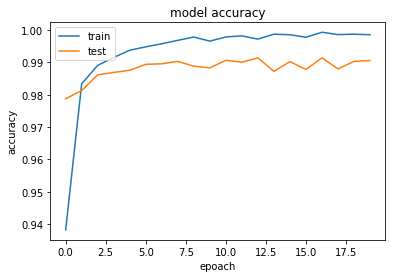

In [6]:
# 绘图 总的历史准确率数据
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoach')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

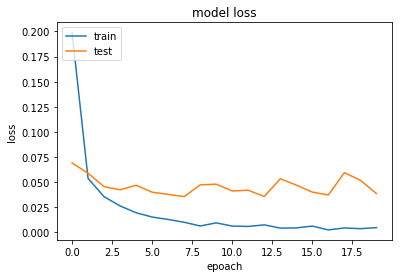

In [7]:
# 绘总损失函数准确率数据
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoach')
plt.legend(['train', 'test'], loc='upper left')
plt.show()